In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/metrics/wideresnet/wideresnet_third/metrics_by_epoch.txt', delimiter='\t')
df

,Epoch,Phase,Loss,Accuracy
0,1,train,0.6521,0.6151
1,1,val,0.6043,0.6702
2,2,train,0.5798,0.6920
3,2,val,0.5398,0.7292
4,3,train,0.5358,0.7285
5,3,val,0.5043,0.7521
6,4,train,0.4952,0.7545
7,4,val,0.4541,0.7890
8,5,train,0.4628,0.7751
9,5,val,0.7406,0.7071


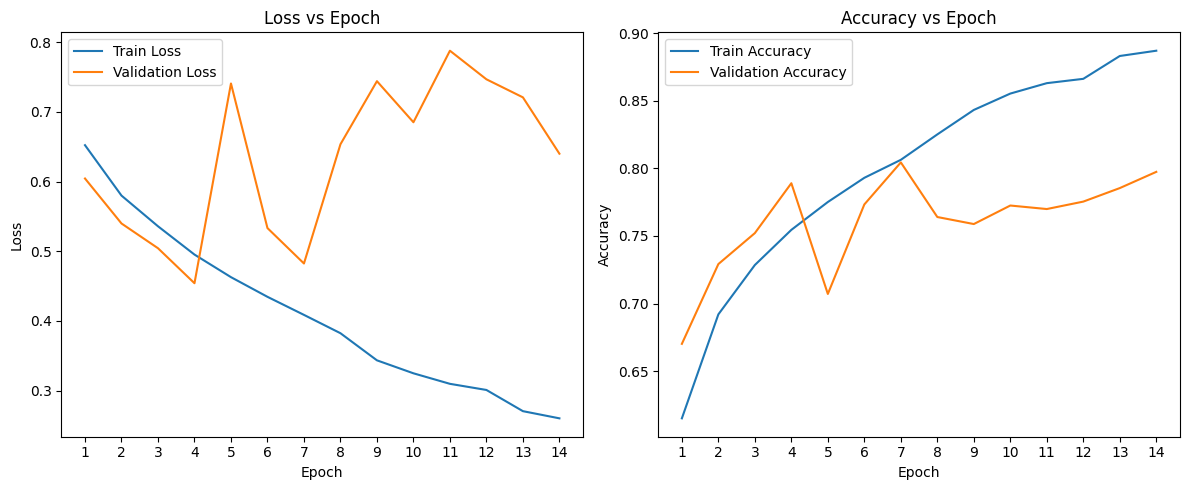

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

#plotting loss
plt.subplot(1, 2, 1)
plt.plot(df[df['Phase'] == 'train']['Epoch'], df[df['Phase'] == 'train']['Loss'], label='Train Loss')
plt.plot(df[df['Phase'] == 'val']['Epoch'], df[df['Phase'] == 'val']['Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.xticks(df['Epoch'].unique())


#plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(df[df['Phase'] == 'train']['Epoch'], df[df['Phase'] == 'train']['Accuracy'], label='Train Accuracy')
plt.plot(df[df['Phase'] == 'val']['Epoch'], df[df['Phase'] == 'val']['Accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.xticks(df['Epoch'].unique())

plt.tight_layout()
plt.show()

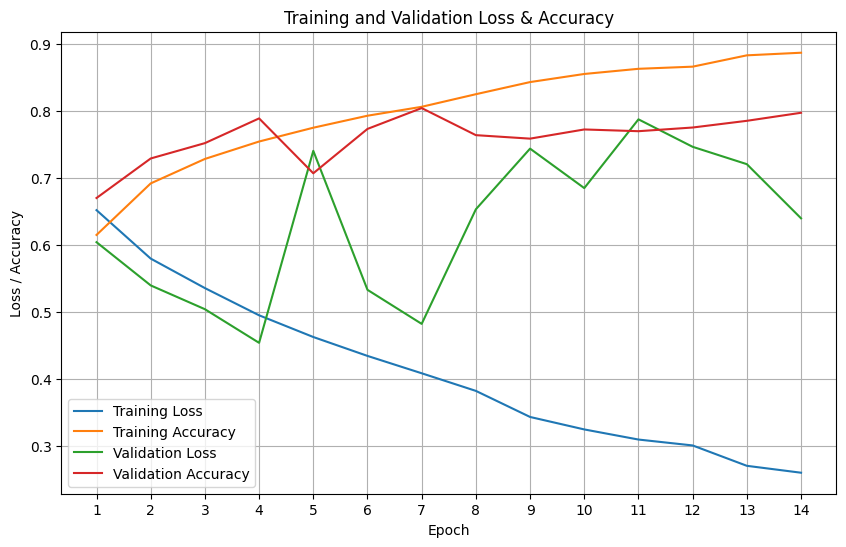

In [116]:
train_df = df[df['Phase'] == 'train']
val_df = df[df['Phase'] == 'val']

plt.figure(figsize=(10, 6))

#training loss and accuracy
plt.plot(train_df['Epoch'], train_df['Loss'], label='Training Loss')
plt.plot(train_df['Epoch'], train_df['Accuracy'], label='Training Accuracy')

#validation loss and accuracy
plt.plot(val_df['Epoch'], val_df['Loss'], label='Validation Loss')
plt.plot(val_df['Epoch'], val_df['Accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Training and Validation Loss & Accuracy')
plt.legend()
plt.xticks(df['Epoch'].unique())
plt.grid(True)
plt.show()

In [118]:
!cat /content/drive/MyDrive/metrics/wideresnet/wideresnet_third/metrics.txt

Phase: validation
Classification Report:
Class 0:
  precision: 0.9270
  recall: 0.9020
  f1-score: 0.9143
  support: 5000.0000
Class 1:
  precision: 0.9046
  recall: 0.9290
  f1-score: 0.9166
  support: 5000.0000
Class macro avg:
  precision: 0.9158
  recall: 0.9155
  f1-score: 0.9155
  support: 10000.0000
Class weighted avg:
  precision: 0.9158
  recall: 0.9155
  f1-score: 0.9155
  support: 10000.0000

Confusion Matrix:
[[4510  490]
 [ 355 4645]]
Phase: test
Classification Report:
Class 0:
  precision: 0.9242
  recall: 0.8980
  f1-score: 0.9109
  support: 5000.0000
Class 1:
  precision: 0.9008
  recall: 0.9264
  f1-score: 0.9134
  support: 5000.0000
Class macro avg:
  precision: 0.9125
  recall: 0.9122
  f1-score: 0.9122
  support: 10000.0000
Class weighted avg:
  precision: 0.9125
  recall: 0.9122
  f1-score: 0.9122
  support: 10000.0000

Confusion Matrix:
[[4490  510]
 [ 368 4632]]
Phase: validation
Classification Report:
Class 0:
  precision: 0.9731
  recall: 0.9760
  f1-score: 0.9

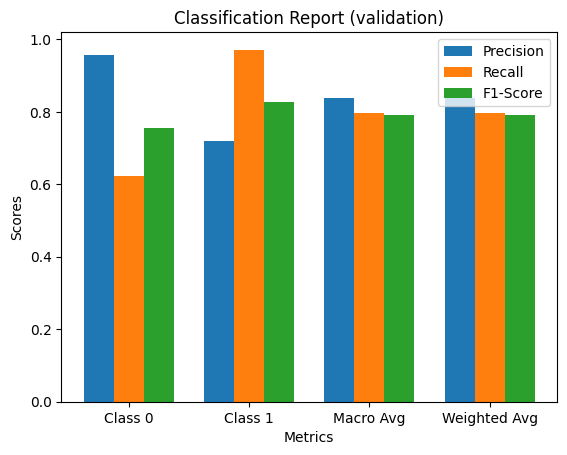

In [119]:
#classification report data
labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.9561, 0.7206, 0.8384, 0.8384]
recall = [0.6234, 0.9714, 0.7974, 0.7974]
f1_score = [0.7547, 0.8274, 0.7911, 0.7911]

x = np.arange(len(labels))

width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Report (validation)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


The metrics for both classes are quite consistent, indicating balanced performance across classes.

The Macro Average and Weighted Average metrics are also consistent with the individual class metrics, suggesting that the model performs uniformly well across different classes.

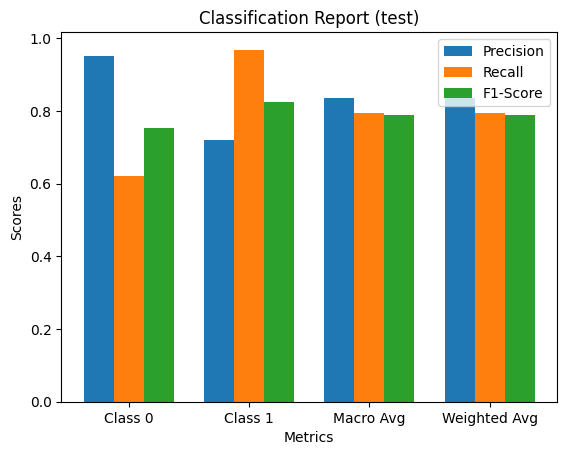

In [120]:
#classification report data
labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.9523, 0.7195, 0.8359, 0.8359]
recall = [0.6224, 0.9688, 0.7956, 0.7956]
f1_score = [0.7528, 0.8258, 0.7893, 0.7893]

x = np.arange(len(labels))

width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Report (test)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


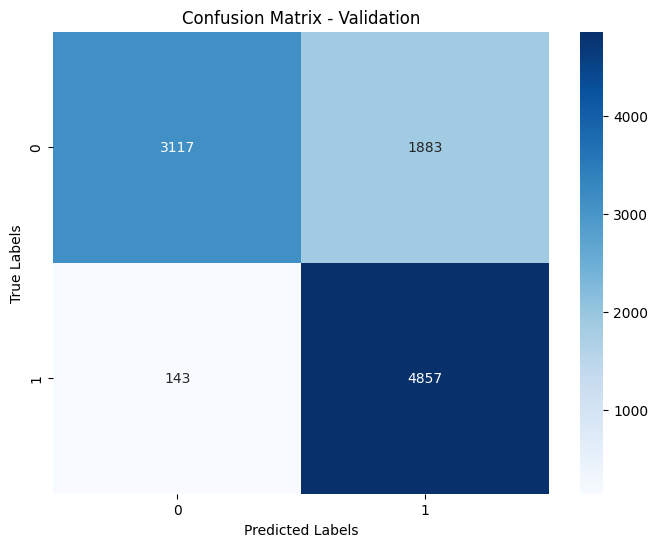

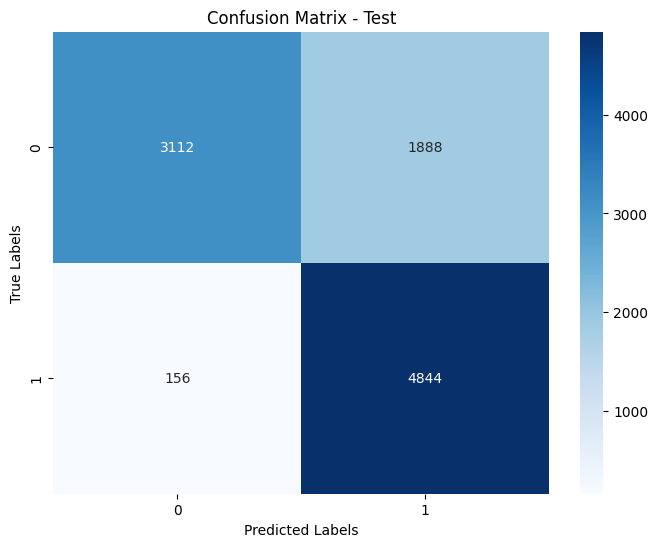

In [121]:
import seaborn as sns

conf_matrix_val = np.array([[3117, 1883], [143, 4857]])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation')
plt.show()

conf_matrix_test = np.array([[3112, 1888], [156, 4844]])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test')
plt.show()


In [122]:
import json
with open('/content/drive/MyDrive/metrics/wideresnet/wideresnet_third/metrics_data.json', 'r') as f:
    metrics_data = json.load(f)

In [123]:
metrics_data['epoch_metrics']

[{'epoch': 1, 'loss': 0.6043361403942108, 'accuracy': 0.6702},
 {'epoch': 2, 'loss': 0.5398336869239807, 'accuracy': 0.7292000000000001},
 {'epoch': 3, 'loss': 0.5043102386951447, 'accuracy': 0.7521},
 {'epoch': 4, 'loss': 0.45411805057525634, 'accuracy': 0.789},
 {'epoch': 5, 'loss': 0.740609761339426, 'accuracy': 0.7071000000000001},
 {'epoch': 6, 'loss': 0.5332377557873725, 'accuracy': 0.7733},
 {'epoch': 7, 'loss': 0.482401632475853, 'accuracy': 0.8044},
 {'epoch': 8, 'loss': 0.653390078535676, 'accuracy': 0.764},
 {'epoch': 9, 'loss': 0.7439054067537189, 'accuracy': 0.7588},
 {'epoch': 10, 'loss': 0.6849621303364635, 'accuracy': 0.7725000000000001},
 {'epoch': 11, 'loss': 0.7875788228422403, 'accuracy': 0.7699},
 {'epoch': 12, 'loss': 0.7465841624945402, 'accuracy': 0.7754000000000001},
 {'epoch': 13, 'loss': 0.7206835862331092, 'accuracy': 0.7854},
 {'epoch': 14, 'loss': 0.6398550834685564, 'accuracy': 0.7974}]

In [124]:
metrics_data['confusion_matrices']

[[[2745, 2255], [1043, 3957]],
 [[3205, 1795], [913, 4087]],
 [[3611, 1389], [1090, 3910]],
 [[3854, 1146], [964, 4036]],
 [[2445, 2555], [374, 4626]],
 [[3098, 1902], [365, 4635]],
 [[3488, 1512], [444, 4556]],
 [[2852, 2148], [212, 4788]],
 [[2714, 2286], [126, 4874]],
 [[2872, 2128], [147, 4853]],
 [[2803, 2197], [104, 4896]],
 [[2925, 2075], [171, 4829]],
 [[2953, 2047], [99, 4901]],
 [[3117, 1883], [143, 4857]]]

In [125]:
for i in metrics_data:
  print(i)

precision_recall
f1_scores
val_probs
val_labels
confusion_matrices
epoch_metrics


In [126]:
for i in metrics_data['precision_recall'][0]:
  print(i)

precision
recall
thresholds


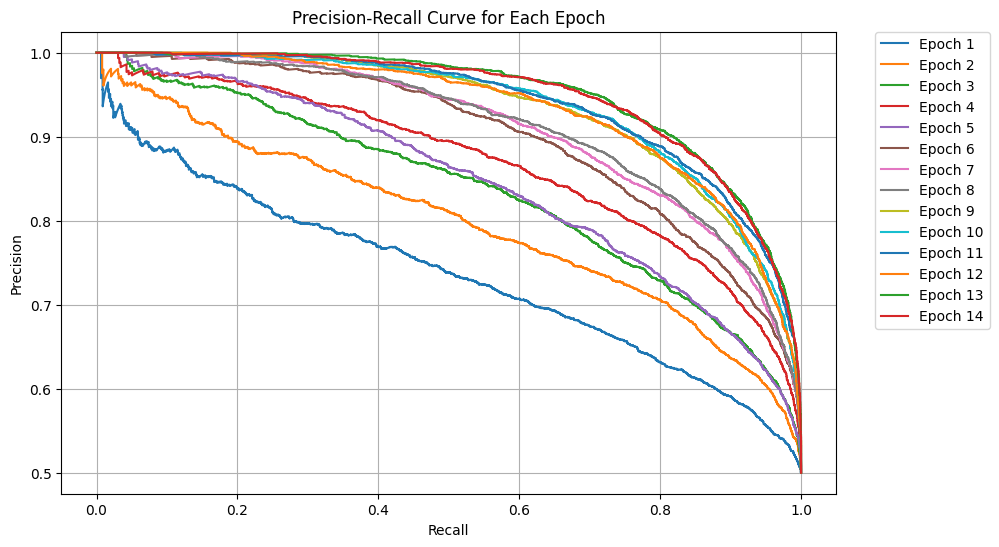

In [127]:
precision_recall_data = metrics_data["precision_recall"]

plt.figure(figsize=(10, 6))

for i, data in enumerate(precision_recall_data):
    plt.plot(data["recall"], data["precision"], label=f"Epoch {i+1}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

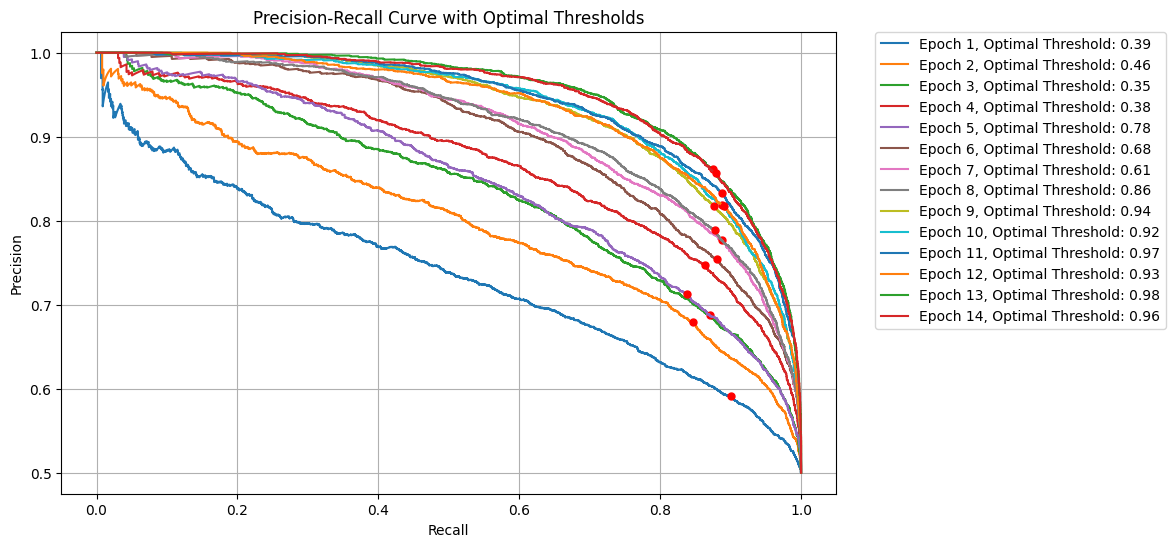

In [128]:
# Extract precision, recall, and thresholds for each epoch
precision_recall_data = metrics_data["precision_recall"]

plt.figure(figsize=(10, 6))

for i, data in enumerate(precision_recall_data):
    precision = data["precision"]
    recall = data["recall"]
    thresholds = data["thresholds"]

    #finding the threshold that maximizes F1-score
    f1_scores = 2 * np.array(precision) * np.array(recall) / (np.array(precision) + np.array(recall))
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    #adding the optimal threshold on the plot
    plt.plot(recall, precision, label=f"Epoch {i+1}, Optimal Threshold: {optimal_threshold:.2f}")
    plt.plot(recall[optimal_idx], precision[optimal_idx], marker='o', markersize=5, color='red')


plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Optimal Thresholds")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

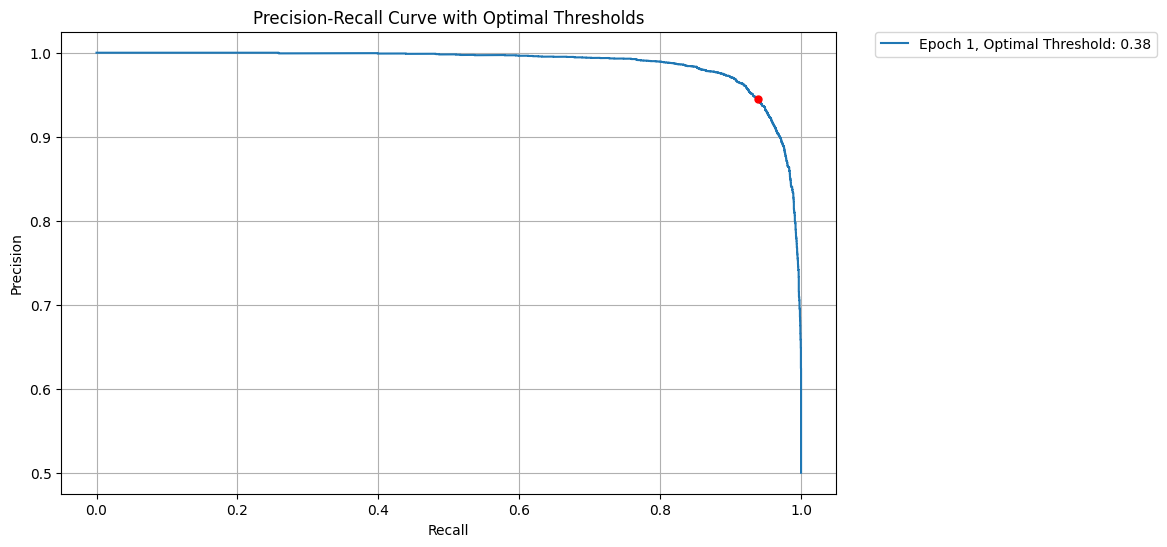

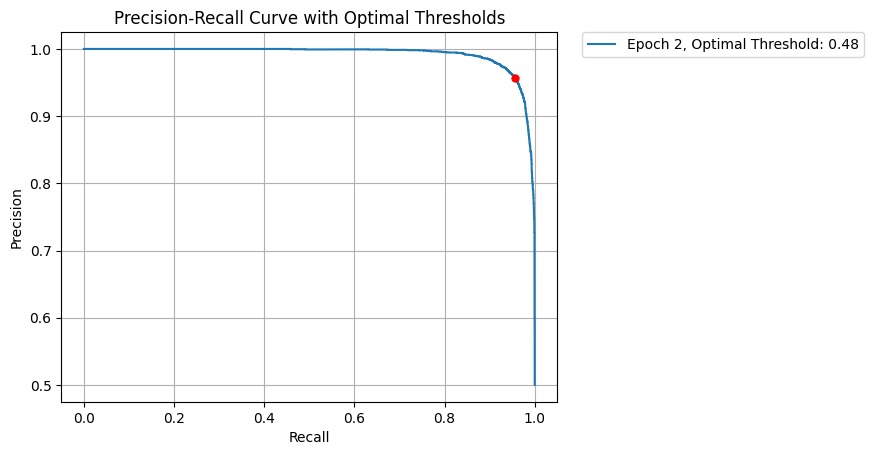

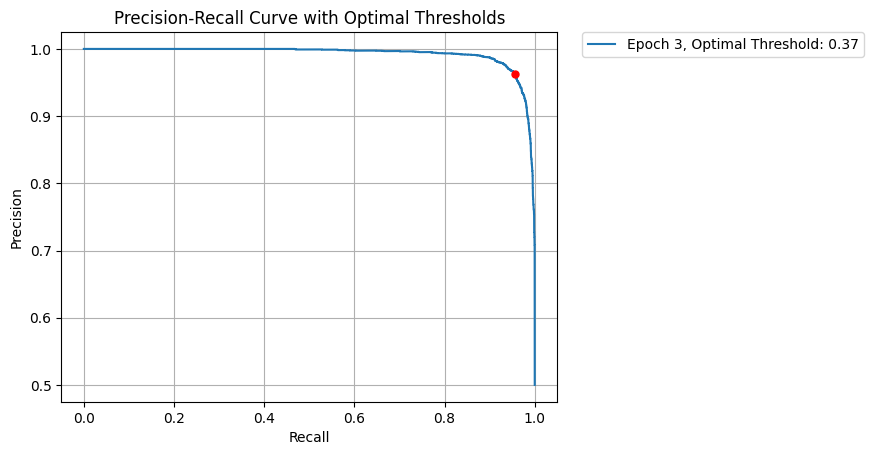

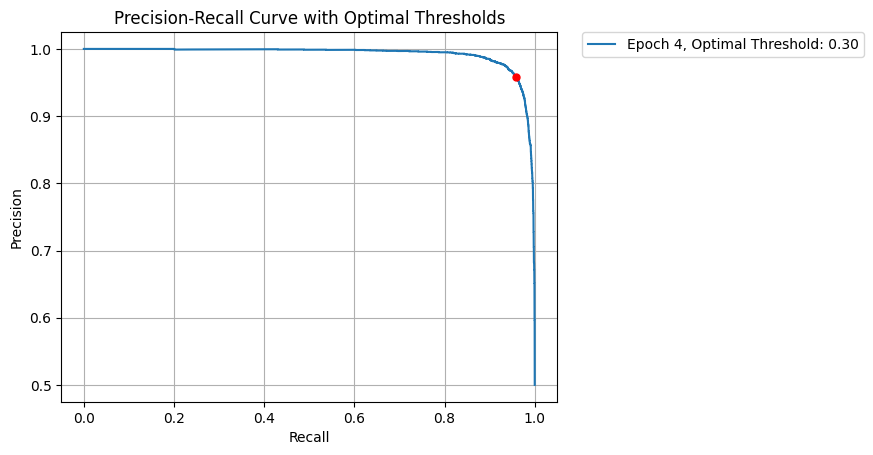

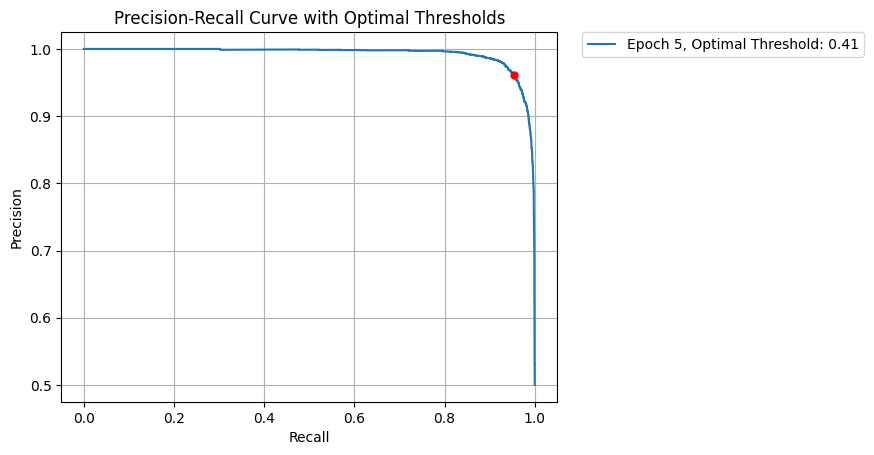

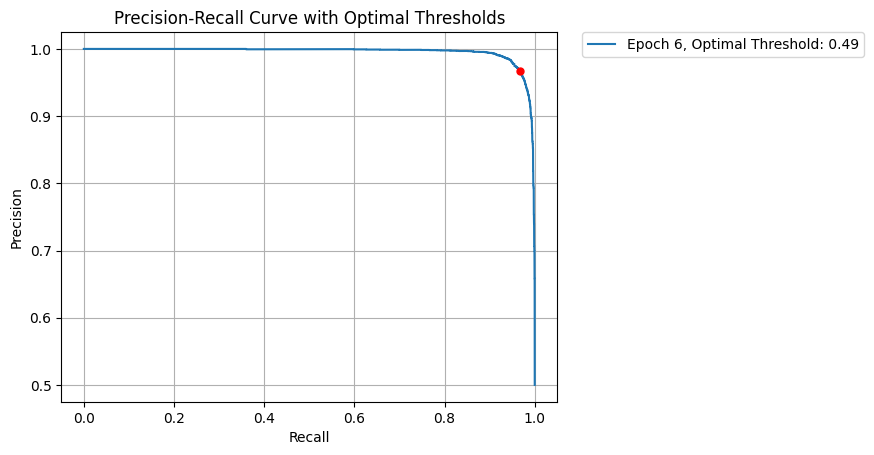

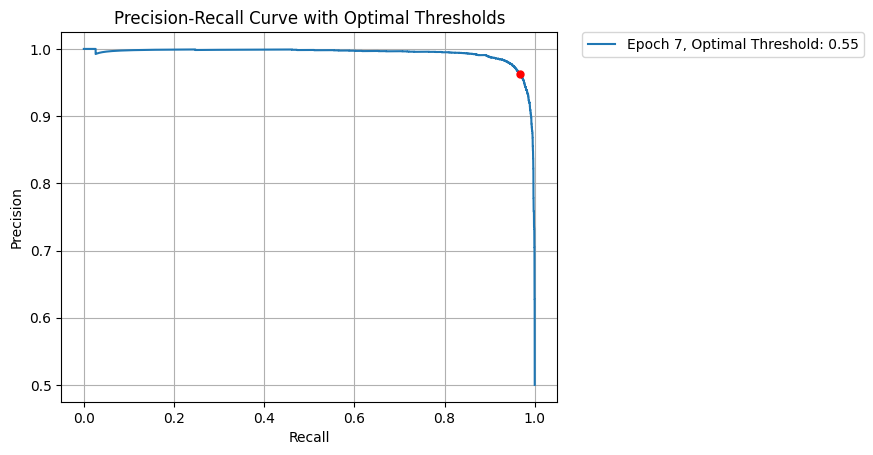

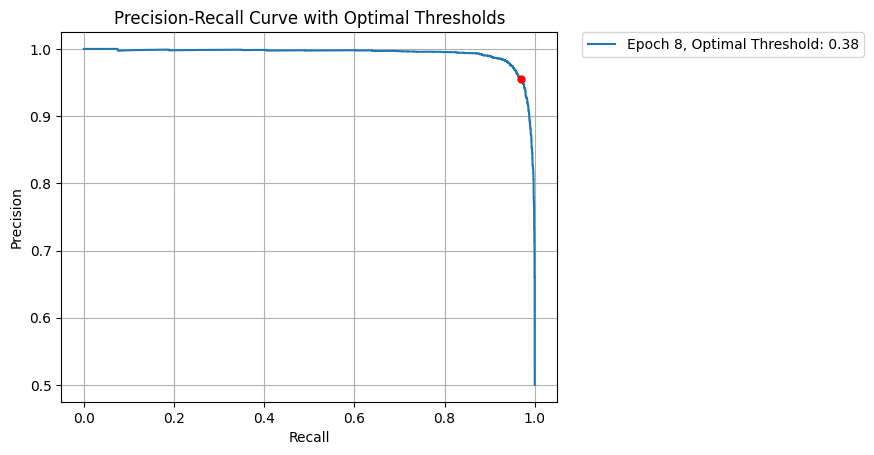

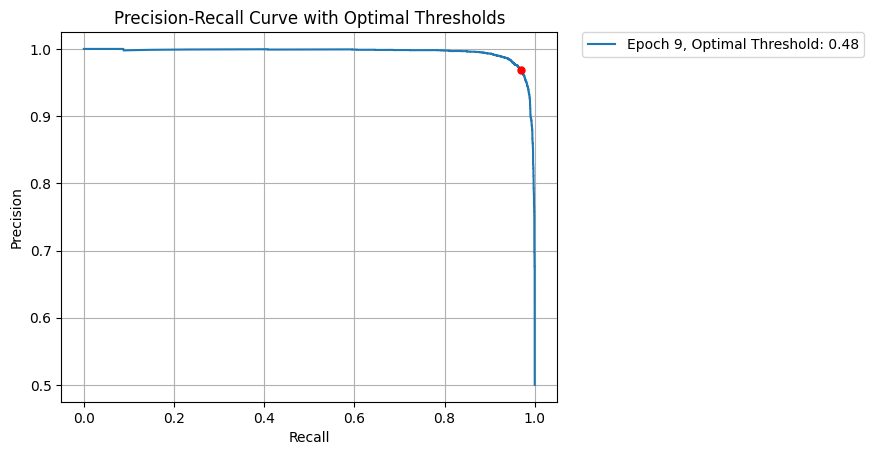

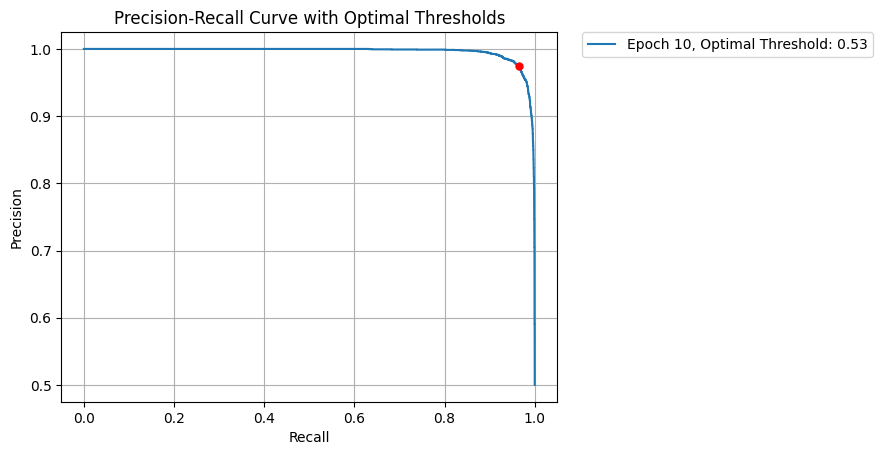

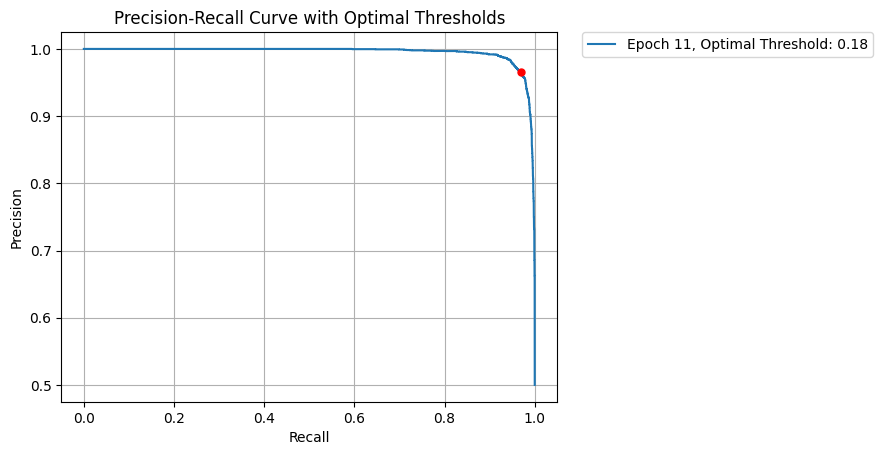

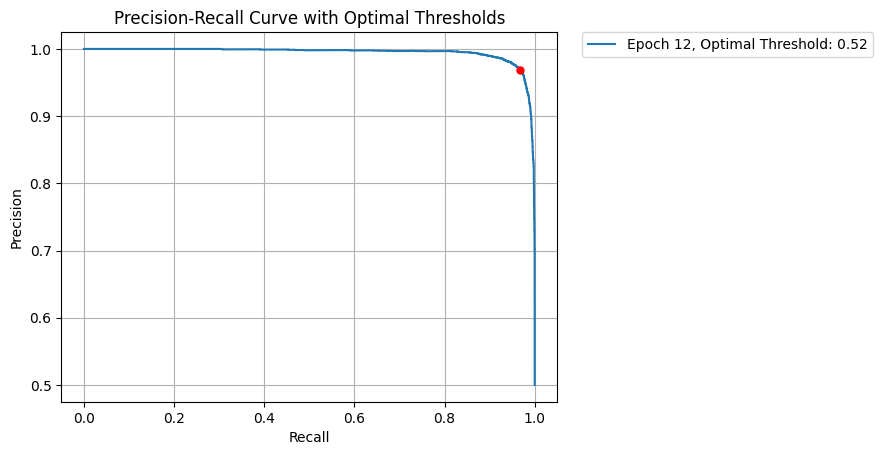

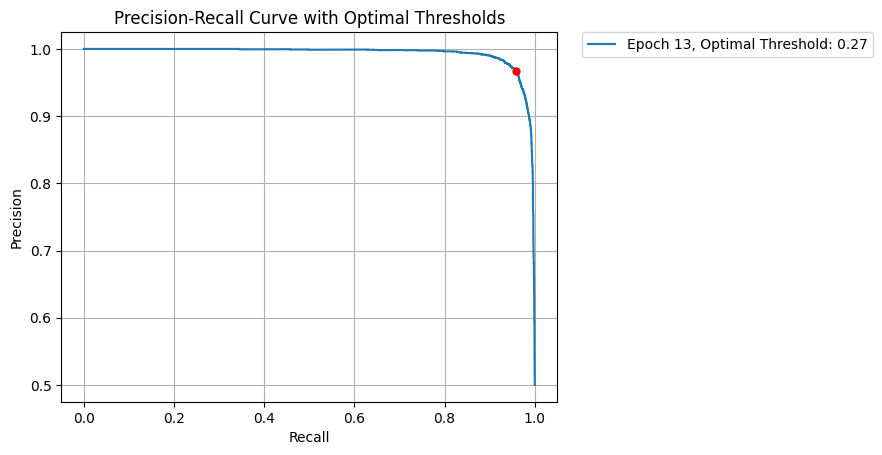

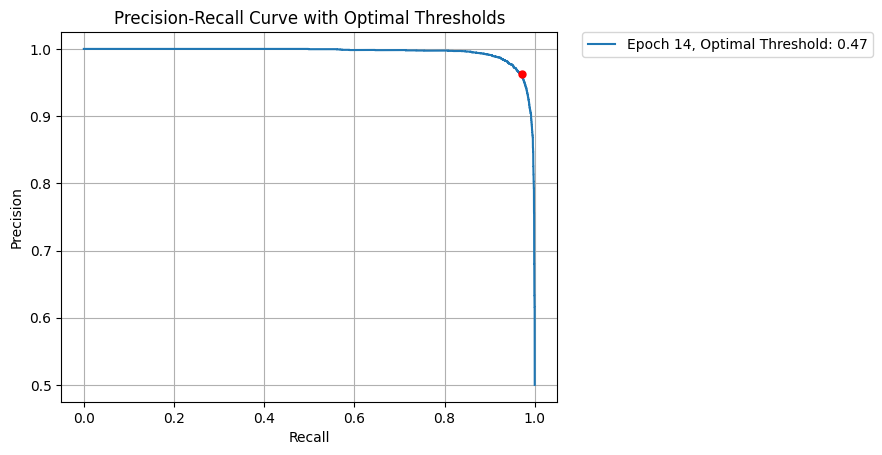

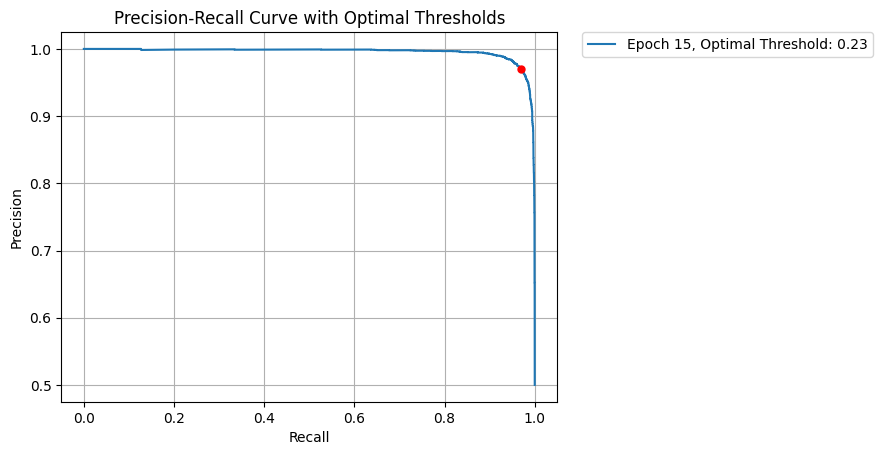

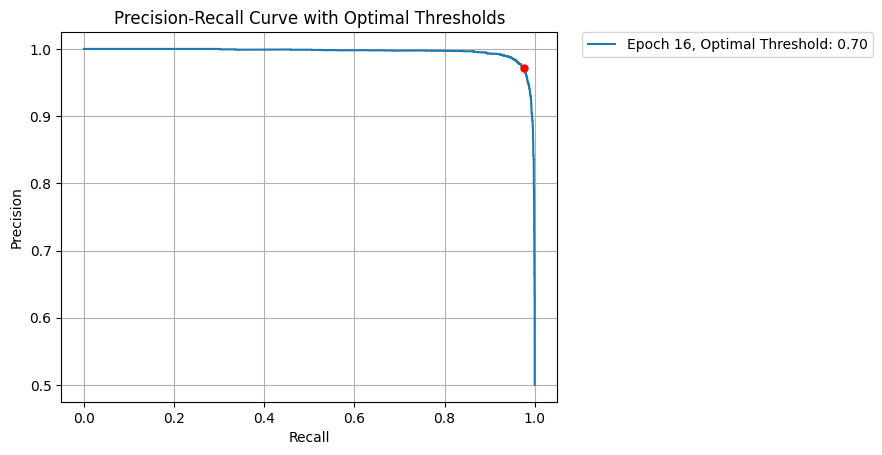

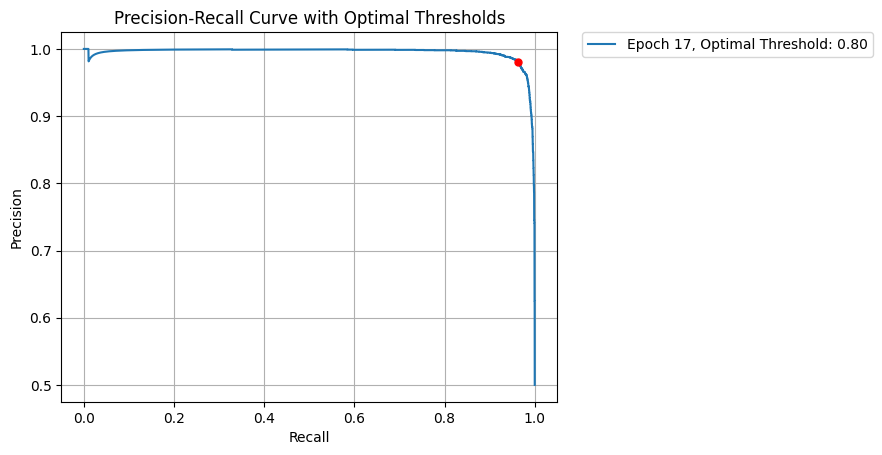

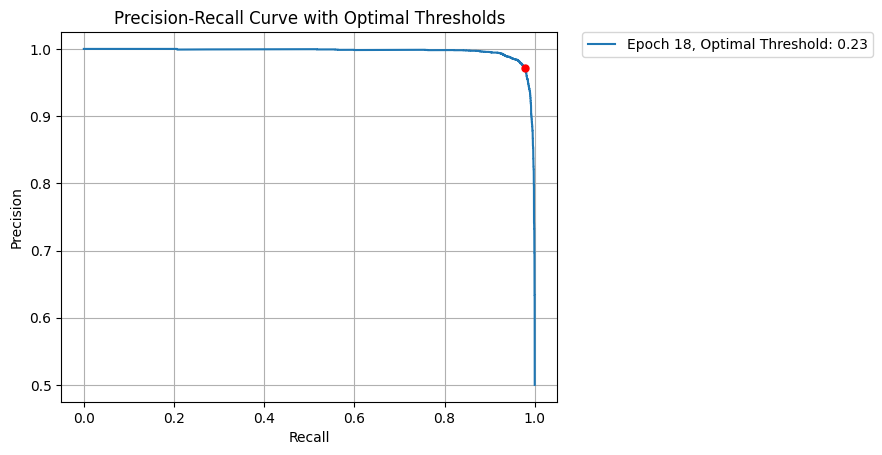

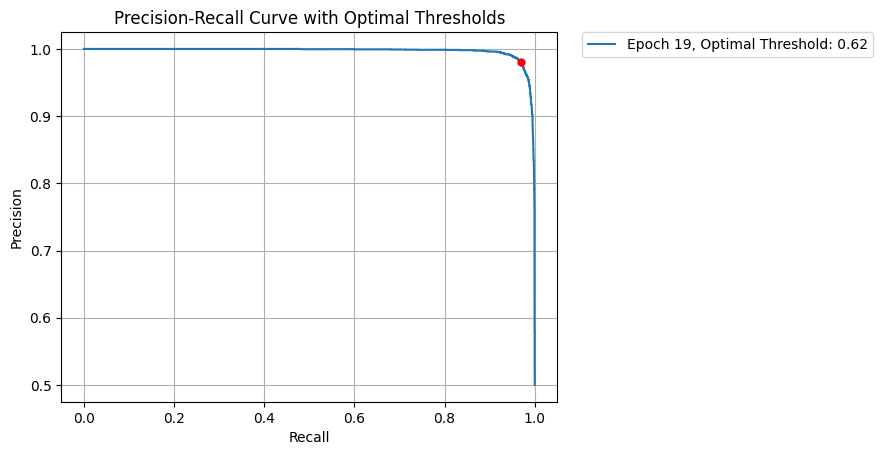

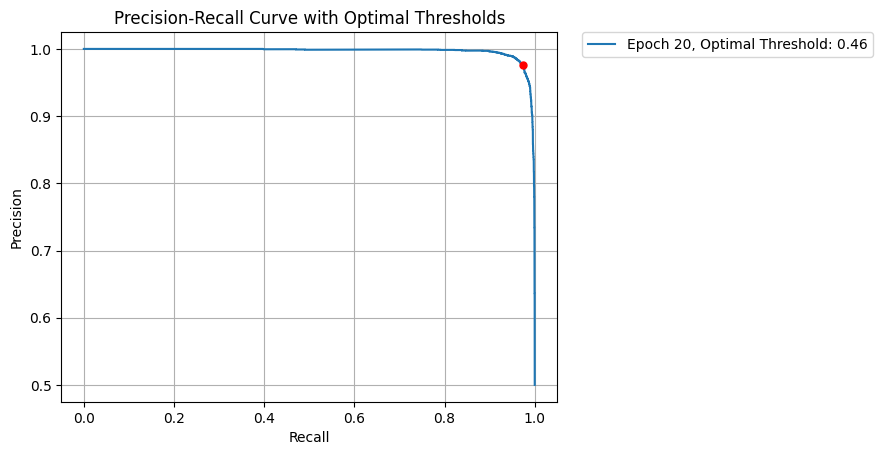

In [76]:
# Extract precision, recall, and thresholds for each epoch
precision_recall_data = metrics_data["precision_recall"]

plt.figure(figsize=(10, 6))

for i, data in enumerate(precision_recall_data):
    precision = data["precision"]
    recall = data["recall"]
    thresholds = data["thresholds"]

    #finding the threshold that maximizes F1-score
    f1_scores = 2 * np.array(precision) * np.array(recall) / (np.array(precision) + np.array(recall))
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    #adding the optimal threshold on the plot
    plt.plot(recall, precision, label=f"Epoch {i+1}, Optimal Threshold: {optimal_threshold:.2f}")
    plt.plot(recall[optimal_idx], precision[optimal_idx], marker='o', markersize=5, color='red')


    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve with Optimal Thresholds")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.show()